In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import time
from os.path import exists

from sklearn import tree
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import datetime
import draw_cnf_mat

In [2]:
data = np.loadtxt('data/latent_data_miRNA.csv', delimiter=',')
print(data.shape)

labels = np.loadtxt('data/encoded_labels.csv')
print(labels.shape)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


now = datetime.datetime.now()
Time_Now= now.strftime("%Y-%m-%d %H:%M:%S")

PC= 'Lenovo'
dataset= 'Pan'
print("Shape of Train Data : {}".format(x_train.shape))
print("Shape of Test Data : {}".format(x_test.shape))
print ('All samples:', x_train.shape[0] + x_test.shape[0])

target_names=['UNKNOWN','ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'HNSC',
            'KICH', 'KIRC', 'KIRP', 'LGG','LIHC','LUAD',  'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD',
            'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA','THYM', 'UCEC', 'UCS',  'UVM']


(6241, 128)
(6241,)
Shape of Train Data : (4992, 128)
Shape of Test Data : (1249, 128)
All samples: 6241


In [3]:
#produce results

path='data/results_miRNA/results_ensembl_ML'

def write_results(results, path):
    
    file_exists = exists(path)
    if not(file_exists):
        with open(path,"a+") as f:
            f.write(results)
            f.write("\n")
    else:
        with open(path,"a+") as f:
            f.write(results)

In [4]:
#Using Random Forest Classifier
t1=time.time()
rf_clf = ensemble.RandomForestClassifier(n_estimators=1)
rf_clf.fit(x_train, y_train)
acc_rf=rf_clf.score(x_test, y_test)

rf_pred=rf_clf.predict(x_test)

print(classification_report(y_test, rf_pred, target_names=target_names), '\n')
confus_matrix= classification_report(y_test, rf_pred, target_names=target_names)


acc= accuracy_score(y_test, rf_pred)
prc =  precision_score(y_test, rf_pred, average='micro')
rec = recall_score(y_test, rf_pred, average='micro')
f1 =  f1_score(y_test, rf_pred, average='micro')

t2=time.time()

results='Random Forest Classfier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)

mcm = multilabel_confusion_matrix(y_test, rf_pred)


              precision    recall  f1-score   support

     UNKNOWN       0.00      0.00      0.00         5
         ACC       0.42      0.83      0.56         6
        BLCA       0.46      0.48      0.47        67
        BRCA       0.66      0.59      0.62       132
        CESC       0.41      0.31      0.35        36
        CHOL       0.17      0.33      0.22         9
        COAD       0.55      0.47      0.51        45
        DLBC       0.50      0.14      0.22         7
        ESCA       0.16      0.15      0.15        20
        HNSC       0.57      0.53      0.55        53
        KICH       0.71      0.91      0.80        11
        KIRC       0.70      0.68      0.69        41
        KIRP       0.61      0.73      0.67        41
         LGG       0.99      0.95      0.97        93
        LIHC       0.59      0.42      0.49        40
        LUAD       0.51      0.48      0.50        60
        LUSC       0.38      0.43      0.41        35
        MESO       0.07    

In [5]:
# Using simple Decision Tree classifier
t1=time.time()
dt_clf = tree.DecisionTreeClassifier(max_depth=7)
dt_clf.fit(x_train, y_train)
acc_dt=dt_clf.score(x_test, y_test)

t2=time.time()



dt_pred=dt_clf.predict(x_test)

print(classification_report(y_test, dt_pred), '\n')
confus_matrix= classification_report(y_test, dt_pred)


#conf_matrix = confusion_matrix(y_true=y_test, y_pred=dt_pred)
acc = accuracy_score(y_test, dt_pred)
prc = precision_score(y_test, dt_pred, average='micro')
rec = recall_score(y_test, dt_pred, average='micro')
f1 = f1_score(y_test, dt_pred, average='micro')


results='Decision Tree classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00        67
         3.0       0.83      0.45      0.59       132
         4.0       0.00      0.00      0.00        36
         5.0       0.00      0.00      0.00         9
         6.0       0.00      0.00      0.00        45
         7.0       0.00      0.00      0.00         7
         8.0       0.00      0.00      0.00        20
         9.0       0.08      0.96      0.16        53
        10.0       0.00      0.00      0.00        11
        11.0       0.24      0.22      0.23        41
        12.0       1.00      0.44      0.61        41
        13.0       0.99      0.84      0.91        93
        14.0       0.00      0.00      0.00        40
        15.0       0.35      0.15      0.21        60
        16.0       0.00      0.00      0.00        35
        17.0       0.00    

/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/pytho

In [ ]:
#Using Gradient Boosting Classifier
t1=time.time()
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
acc_gb=gb_clf.score(x_test, y_test)

gb_pred=gb_clf.predict(x_test)

print(classification_report(y_test, gb_pred), '\n')
confus_matrix= classification_report(y_test, gb_pred)


acc= accuracy_score(y_test, gb_pred)
prc =  precision_score(y_test, gb_pred, average='micro')
rec = recall_score(y_test, gb_pred, average='micro')
f1 = f1_score(y_test, gb_pred, average='micro')

t2=time.time()


results='Gradient Boosting Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


In [7]:
#Using Naive Bayes Classifier
t1= time.time()
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
# evaluaye the accuracy by this instruction
acc_nb=nb_clf.score(x_test, y_test)
# Or by this, 
#predict the response for test dataset
#y_pred = nb1_clf.predict(x_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
nb_pred=nb_clf.predict(x_test)

print(classification_report(y_test, nb_pred), '\n')
confus_matrix= classification_report(y_test, nb_pred)

acc = accuracy_score(y_test, nb_pred)
prc = precision_score(y_test, nb_pred, average='micro')
rec = recall_score(y_test, nb_pred, average='micro')
f1 = f1_score(y_test, nb_pred, average='micro')

t2=time.time()


results='Naive Bayes Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)



              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.83      0.83      0.83         6
         2.0       0.89      0.51      0.65        67
         3.0       0.96      0.73      0.83       132
         4.0       0.61      0.64      0.62        36
         5.0       0.42      0.89      0.57         9
         6.0       0.58      0.31      0.41        45
         7.0       0.38      0.71      0.50         7
         8.0       0.17      0.25      0.20        20
         9.0       0.64      0.81      0.72        53
        10.0       0.91      0.91      0.91        11
        11.0       0.95      0.88      0.91        41
        12.0       0.83      0.95      0.89        41
        13.0       1.00      0.97      0.98        93
        14.0       0.94      0.80      0.86        40
        15.0       0.76      0.75      0.76        60
        16.0       0.66      0.71      0.68        35
        17.0       0.28    

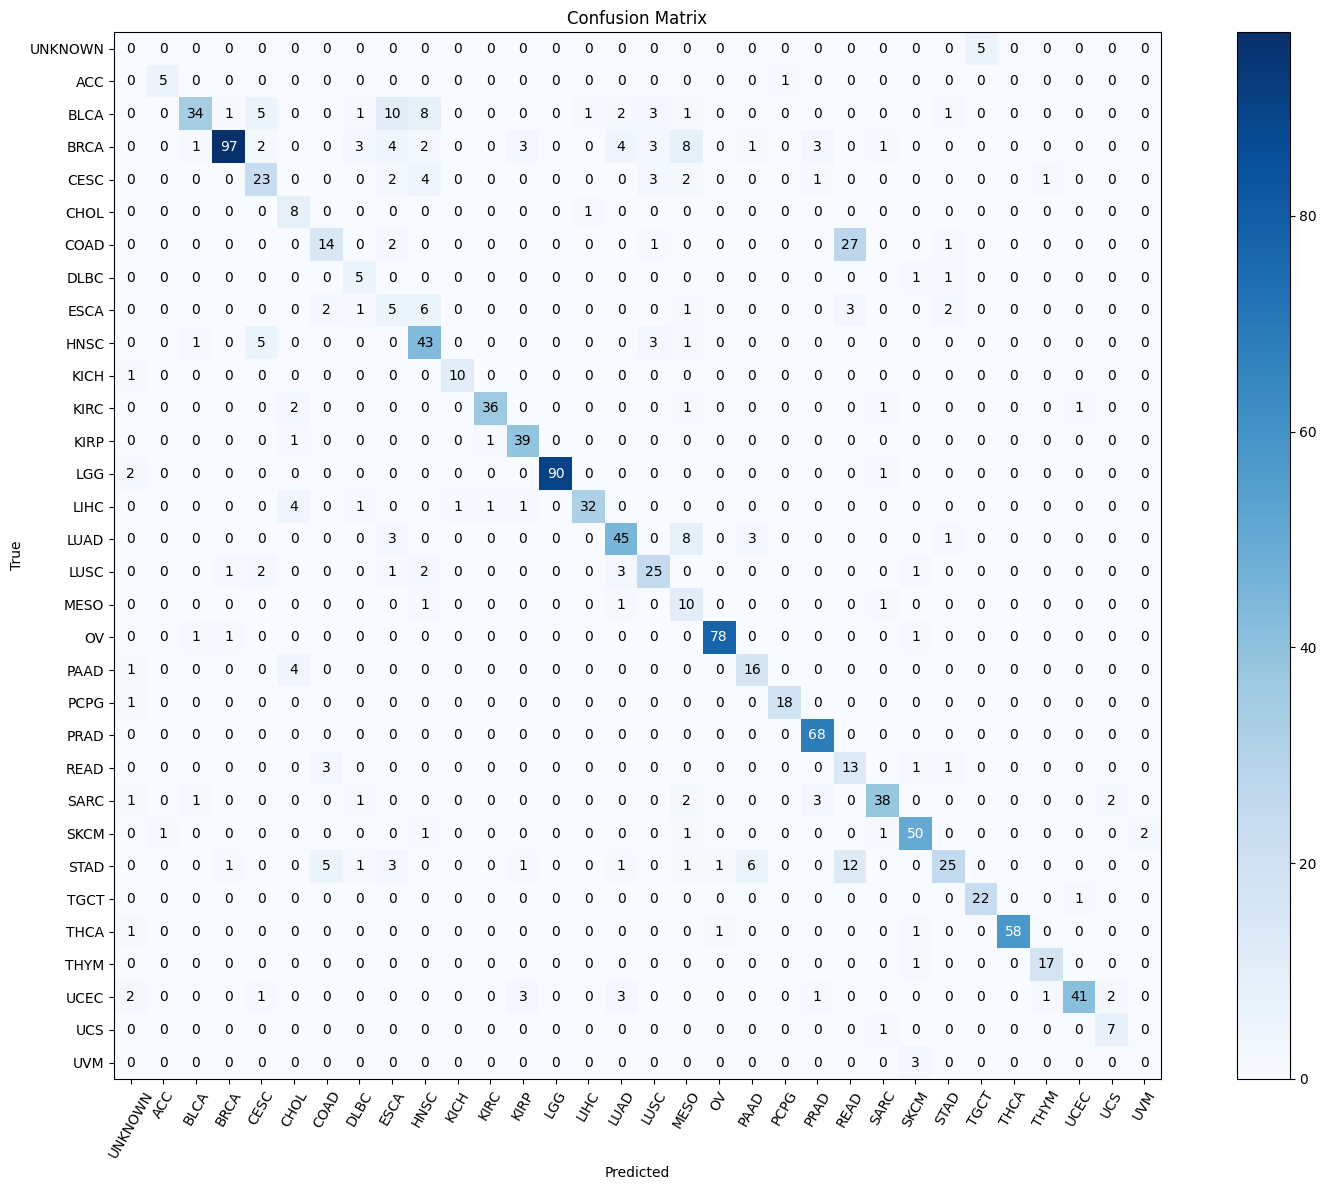

In [8]:
draw_cnf_mat.draw(y_test, nb_pred, "Naive Bayes")

In [9]:
#Using K-nearest neighbors Classifier


t1= time.time()
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(x_train, y_train)
acc_knn_clf=knn_clf.score(x_test, y_test)

knn_pred=knn_clf.predict(x_test)

print(classification_report(y_test, knn_pred), '\n')
confus_matrix= classification_report(y_test, knn_pred)


acc = accuracy_score(y_test, knn_pred)
prc = precision_score(y_test, knn_pred, average='micro')
rec = recall_score(y_test, knn_pred, average='micro')
f1 = f1_score(y_test, knn_pred, average='micro')

t2=time.time()

results='K-nearest neighbors Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29         5
         1.0       0.86      1.00      0.92         6
         2.0       0.73      0.84      0.78        67
         3.0       0.98      0.94      0.96       132
         4.0       0.55      0.64      0.59        36
         5.0       0.56      1.00      0.72         9
         6.0       0.72      0.93      0.82        45
         7.0       1.00      0.86      0.92         7
         8.0       0.23      0.35      0.27        20
         9.0       0.73      0.70      0.71        53
        10.0       0.92      1.00      0.96        11
        11.0       0.93      0.98      0.95        41
        12.0       0.93      0.93      0.93        41
        13.0       1.00      1.00      1.00        93
        14.0       1.00      0.85      0.92        40
        15.0       0.89      0.82      0.85        60
        16.0       0.70      0.60      0.65        35
        17.0       0.80    

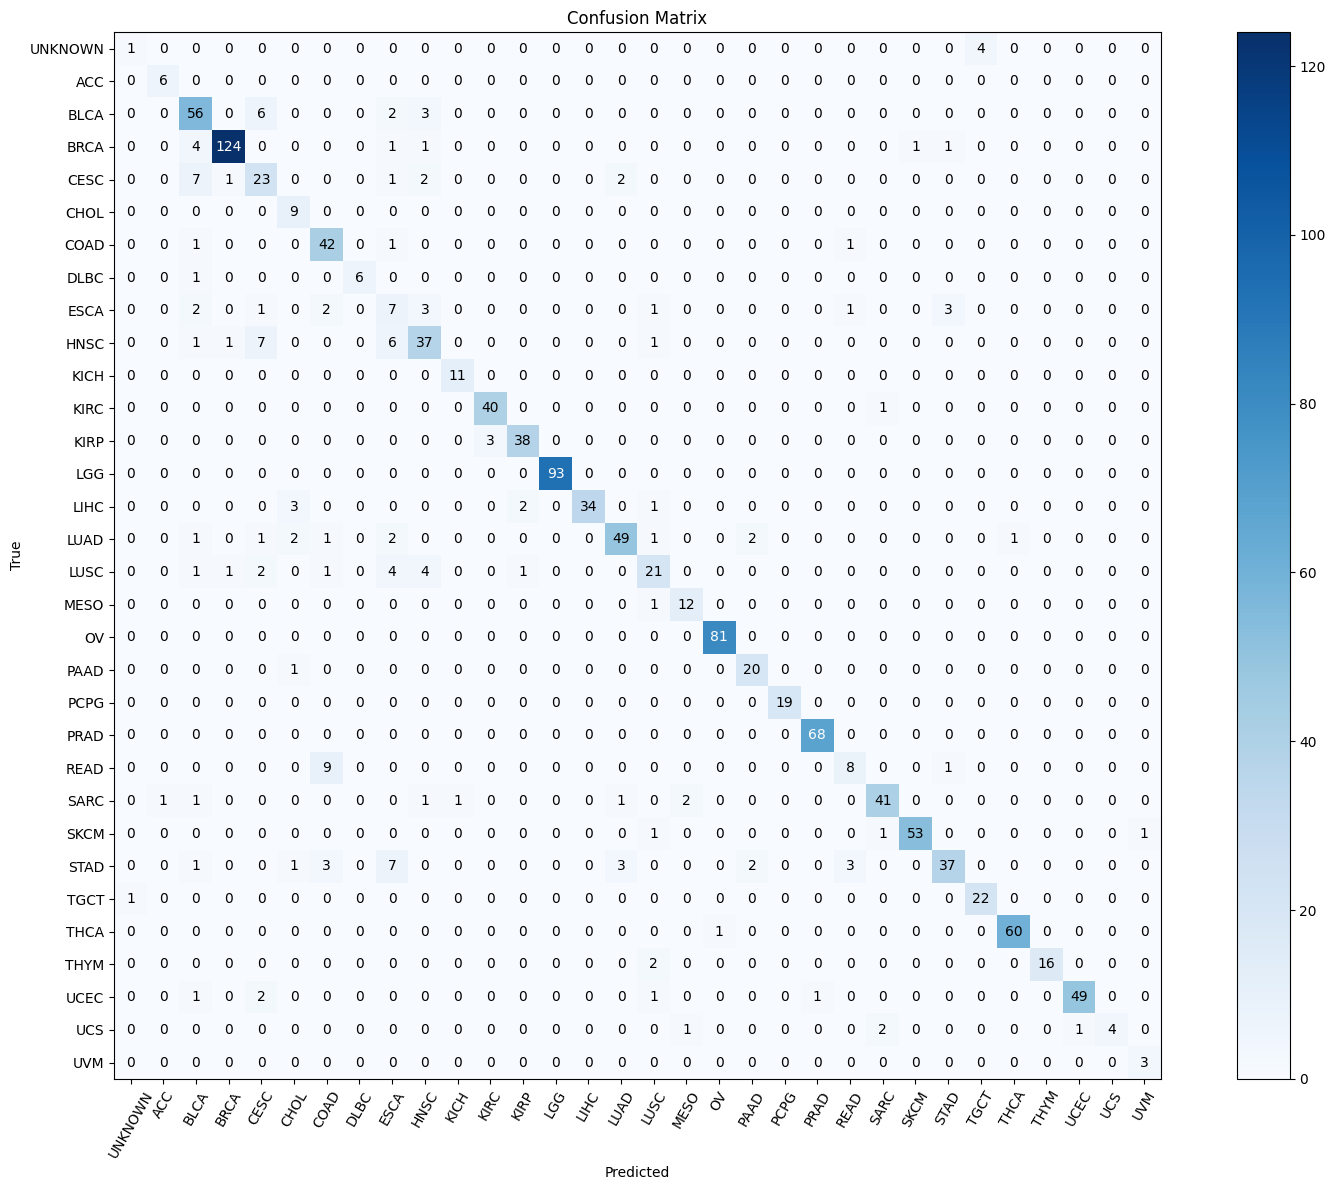

In [10]:
draw_cnf_mat.draw(y_test, knn_pred, "KNN")

In [11]:
#Using Logistic Regression Classifier
t1= time.time()
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
acc_lr=lr_clf.score(x_test, y_test)

lr_pred=lr_clf.predict(x_test)

print(classification_report(y_test, lr_pred), '\n')
confus_matrix= classification_report(y_test, lr_pred)


acc = accuracy_score(y_test, lr_pred)
prc = precision_score(y_test, lr_pred, average= 'micro')
rec = recall_score(y_test, lr_pred, average='micro')
f1 = f1_score(y_test, lr_pred, average='micro')

t2=time.time()

results='Logistic Regression Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)



              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.86      1.00      0.92         6
         2.0       0.85      0.85      0.85        67
         3.0       0.98      0.96      0.97       132
         4.0       0.79      0.75      0.77        36
         5.0       0.88      0.78      0.82         9
         6.0       0.76      0.78      0.77        45
         7.0       0.86      0.86      0.86         7
         8.0       0.55      0.55      0.55        20
         9.0       0.77      0.83      0.80        53
        10.0       1.00      0.91      0.95        11
        11.0       1.00      0.98      0.99        41
        12.0       0.95      0.98      0.96        41
        13.0       1.00      1.00      1.00        93
        14.0       0.95      0.95      0.95        40
        15.0       0.89      0.92      0.90        60
        16.0       0.71      0.71      0.71        35
        17.0       0.92    

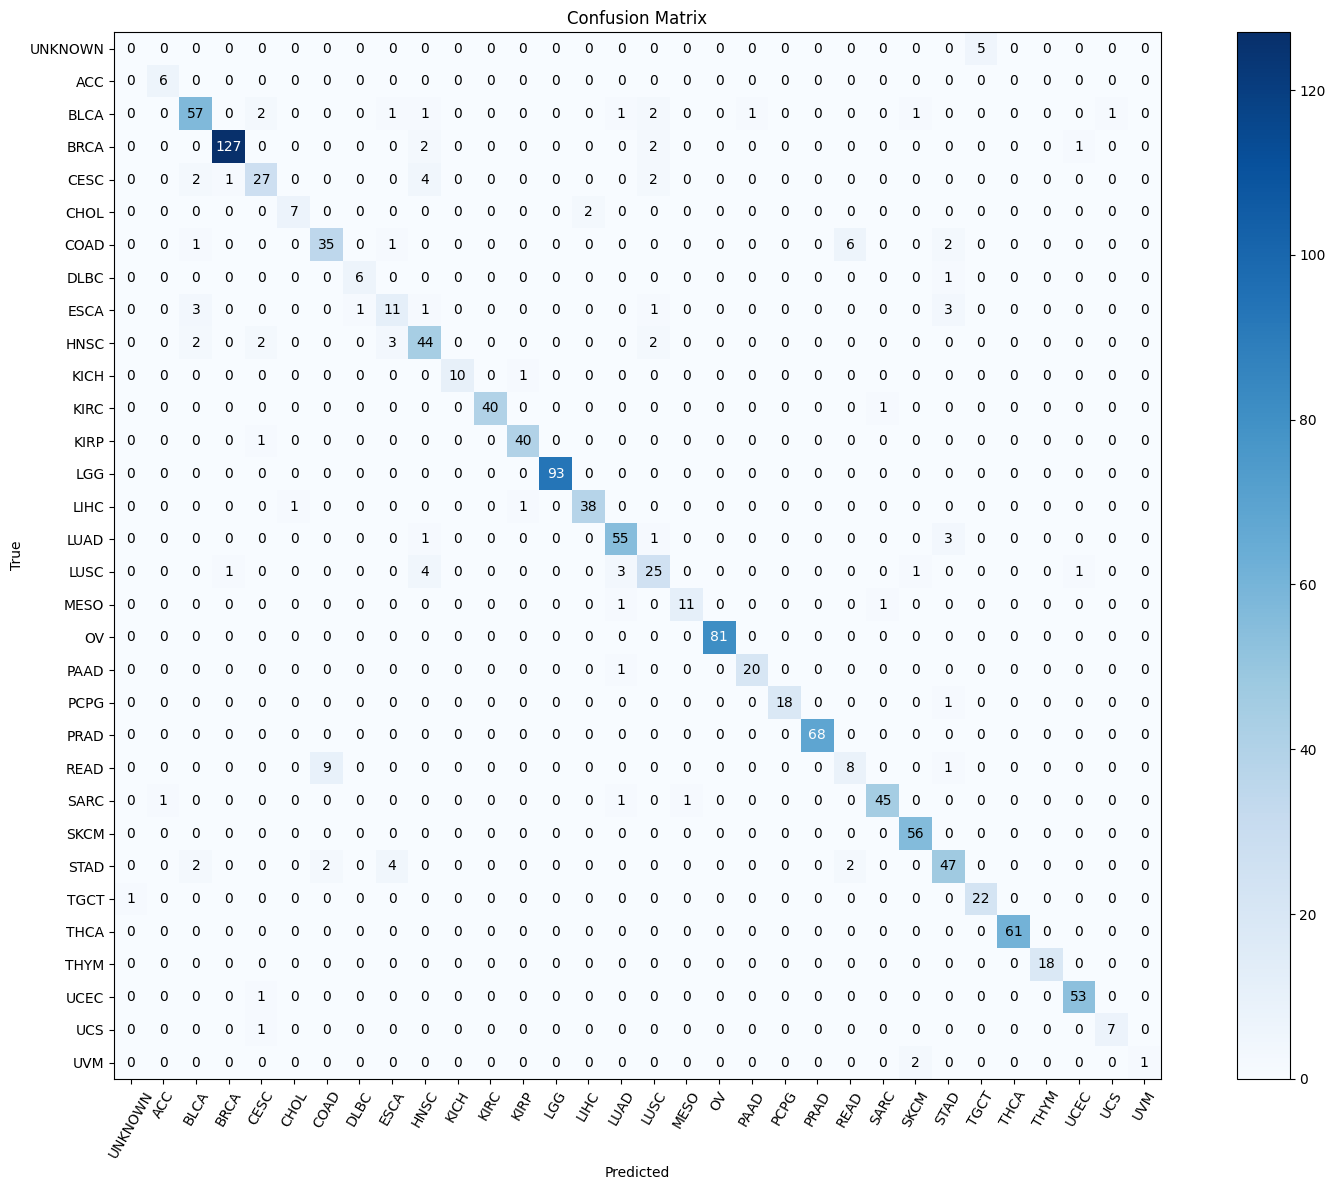

In [12]:
draw_cnf_mat.draw(y_test, lr_pred, "Logistic Regression")

In [13]:
#Using SVM Classifier
t1= time.time()
svm_clf = SVC(probability=True)
svm_clf.fit(x_train, y_train)
acc_svm=svm_clf.score(x_test, y_test)
t2=time.time()
print("Accuracy of SVM Classifier :",acc_svm, " time: ", (t2-t1))

svm_pred=svm_clf.predict(x_test)

print(classification_report(y_test, svm_pred), '\n')
confus_matrix= classification_report(y_test, svm_pred)

acc = accuracy_score(y_test, svm_pred)
prc = precision_score(y_test, svm_pred, average='micro')
rec = recall_score(y_test, svm_pred, average='micro')
f1 = f1_score(y_test, svm_pred, average= 'micro')

results='SVM Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n ============== \n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


Accuracy of SVM Classifier : 0.9247397918334668  time:  5.478954315185547
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.86      1.00      0.92         6
         2.0       0.87      0.90      0.88        67
         3.0       0.99      0.96      0.98       132
         4.0       0.73      0.75      0.74        36
         5.0       0.89      0.89      0.89         9
         6.0       0.69      0.96      0.80        45
         7.0       0.88      1.00      0.93         7
         8.0       0.62      0.25      0.36        20
         9.0       0.85      0.87      0.86        53
        10.0       1.00      0.91      0.95        11
        11.0       0.98      0.98      0.98        41
        12.0       0.98      0.98      0.98        41
        13.0       1.00      1.00      1.00        93
        14.0       0.95      0.95      0.95        40
        15.0       0.93      0.93      0.93        60
       

/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/pytho

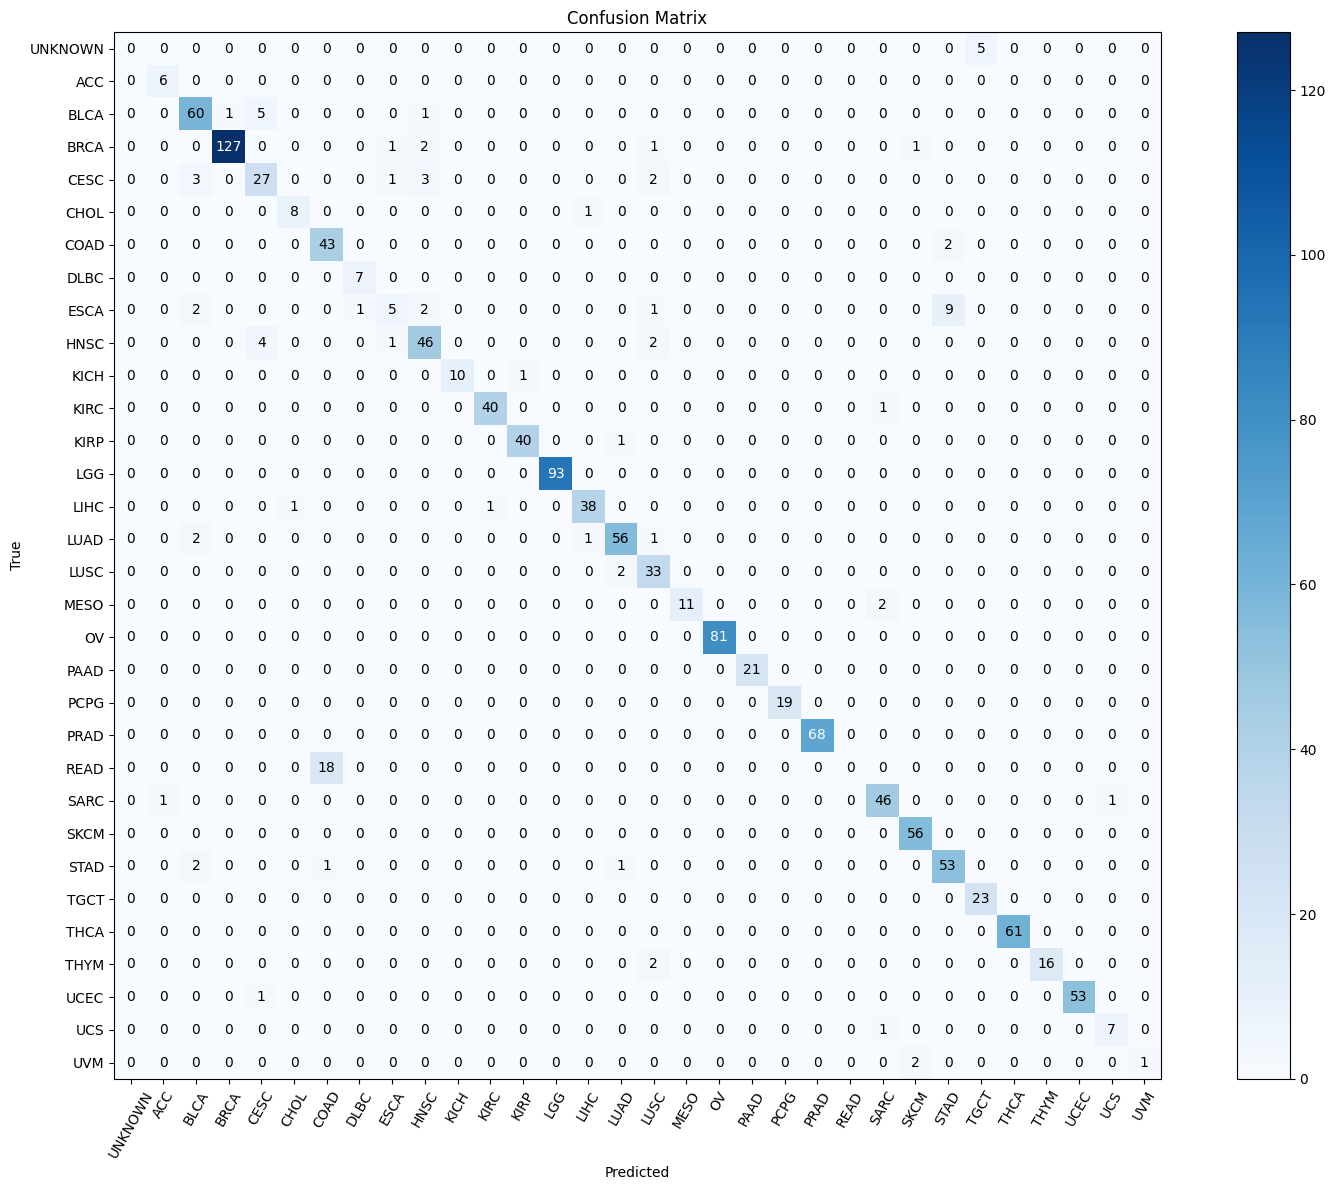

In [14]:
draw_cnf_mat.draw(y_test, svm_pred, "SVM")